# Definition
# Project Definition
The challenge faced herein refers to direct marketing campaigns of a Portuguese banking institution, which were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be or not subscribed. Thus, the result of each phone call is a binary unsuccessful or successful contact. 

# Problem Statement
The problem faced in this project to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Metrics
The metric we are dealing with in this project is the Classification Accuracy, defined as:

acc = (classied_instances)/(instances)

Note that the accuracy is a result of the division of the correctly classified instances by the total number of instances evaluated.



# Analysis

# Introduction
This is the entire implementation of the Machine Learning Capstone.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("bank-additional-full.csv", sep=";")
# Removing clients with duration = 0 (the outcome is "no")
df = df[df["duration"] != 0]
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# Exploratory Data Analysis (EDA)
For each feature

In [2]:
features = list(df)
print(features)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [3]:
# Basic stats
df.describe()

age      duration      campaign         pdays      previous  \
count  41184.000000  41184.000000  41184.000000  41184.000000  41184.000000   
mean      40.023529    258.310096      2.567381    962.471907      0.172980   
std       10.421044    259.279344      2.769895    186.919638      0.494922   
min       17.000000      1.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    319.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count   41184.00000    41184.000000   41184.000000  41184.000000  41184.000000  
mean        0.08192       93.575686     -40.502508      3.621337   5167.037145  
std         1.57096        0.578849       4.628128      1.734438     72.252762  
min        -3.40000       92.201000     -50.800000      0.634000   4963.600000  
25%        -1.80000       93.075000     -42.700000      1.344000   5099.100000  
50%         1.10000       93.749000     -41.800000      4.857000   5191.000000  
75%         1.40000       93.994000     -36.400000      4.961000   5228.100000  
max         1.40000       94.767000     -26.900000      5.045000   5228.100000

In [4]:
num_cols = list(df._get_numeric_data().columns)
cat_cols = [feature for feature in list(df) if feature not in num_cols]
print("numerical_features = ", num_cols)
print("categorical_features = ", cat_cols)

numerical_features =  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


# Exploratory Visualization
# Numerical Features

Clearly, there are points that can be considered outliers into the age plot. However, they wont be removed once it is resonable that a person that is less than 100 years old receives an offer.

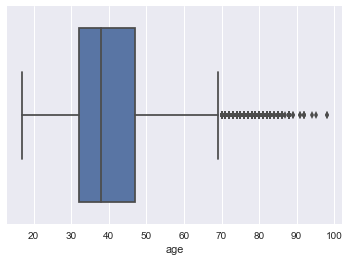

In [77]:
sns.boxplot(x='age', data=df)

Also, 'duration' presents values that are considerably different to the median (Q2). Since the number of large duration calls is not very small, it is resonable to think that some people negociate really hard with the vendors. Thus, this extremes values are maintained.

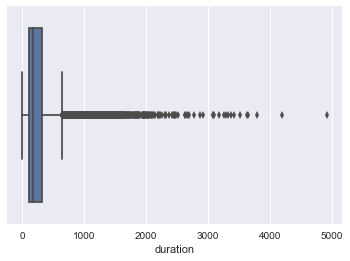

In [78]:
sns.boxplot(x='duration', data=df)

The campaings follow that same idea.

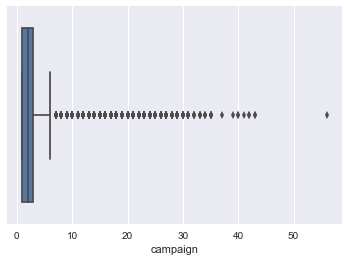

In [79]:
sns.boxplot(x='campaign', data=df)

However, we can cleary see that pdays does not look clear. This is because it represents the number of days pased by from the last contact to that client in a previous campaing. Note that clients that had never been contacted before this campaing present 999 and pdays.

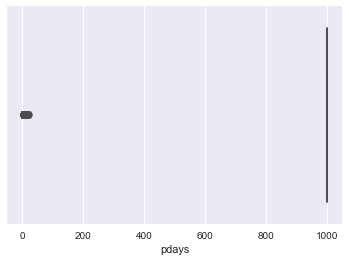

In [80]:
sns.boxplot(x='pdays', data=df)

Thus, we change this value to be near to 0 in order to have a clearer visualization.
Now, in this plot (below), we can see that most of the clients had not been contacted before and that the maximum number of contacts relies around 30.

In [90]:
 df.loc[df["pdays"] == 999, "pdays"] = -1

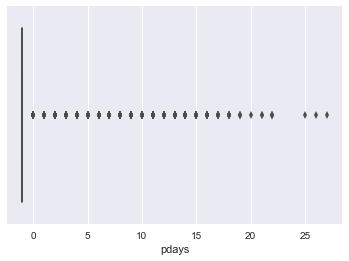

In [91]:
sns.boxplot(x='pdays', data=df)

This plot is clear and shows that the clients in general received up to 7 contacts in previous campaigns.

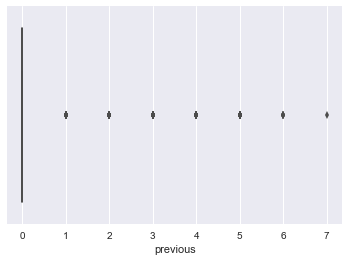

In [92]:
sns.boxplot(x='previous', data=df)

Finally, the followinf boxplots are more stable. Firstly, the employment rate varies from nearly -1.8 up to 1.4.

In [82]:
sns.boxplot(x='emp.var.rate', data=df)

Consumer price index ('cons.price.idx') presents a tiny variation (std = 4.63), ranging from nearly 93 up to nearly 94.

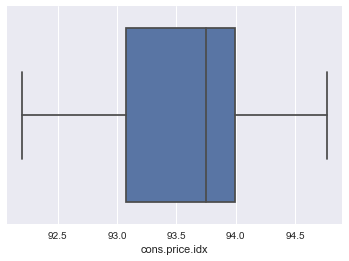

In [83]:
sns.boxplot(x='cons.price.idx', data=df)

cons.conf.idx, on the other hand, presents values below 0 (with mean around -40)

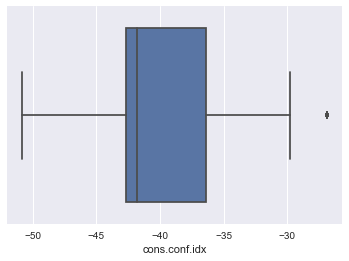

In [84]:
sns.boxplot(x='cons.conf.idx', data=df)

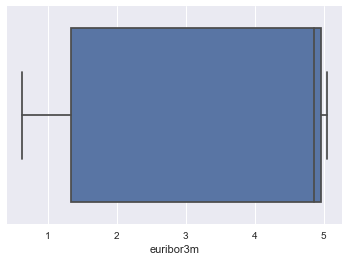

In [85]:
sns.boxplot(x='euribor3m', data=df)

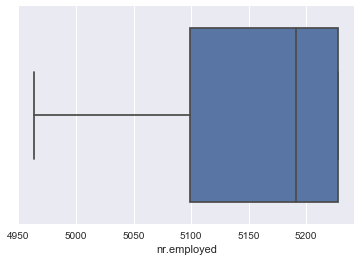

In [86]:
sns.boxplot(x='nr.employed', data=df)

# Categorical Features

In [43]:
for f in cat_cols:
    print("feature = ", f)
    print(df[f].value_counts(),"\n")

feature =  job
admin.           10421
blue-collar       9252
technician        6743
services          3969
management        2923
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

feature =  marital
married     24925
single      11568
divorced     4611
unknown        80
Name: marital, dtype: int64 

feature =  education
university.degree      12167
high.school             9513
basic.9y                6044
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

feature =  default
no         32584
unknown     8597
yes            3
Name: default, dtype: int64 

feature =  housing
yes        21573
no         18621
unknown      990
Name: housing, dtype: int64 

feature =  loan
no         33946
yes         6248
unknown      990
Name: loan

# Data Interpretation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121fefef0>,
      dtype=object)

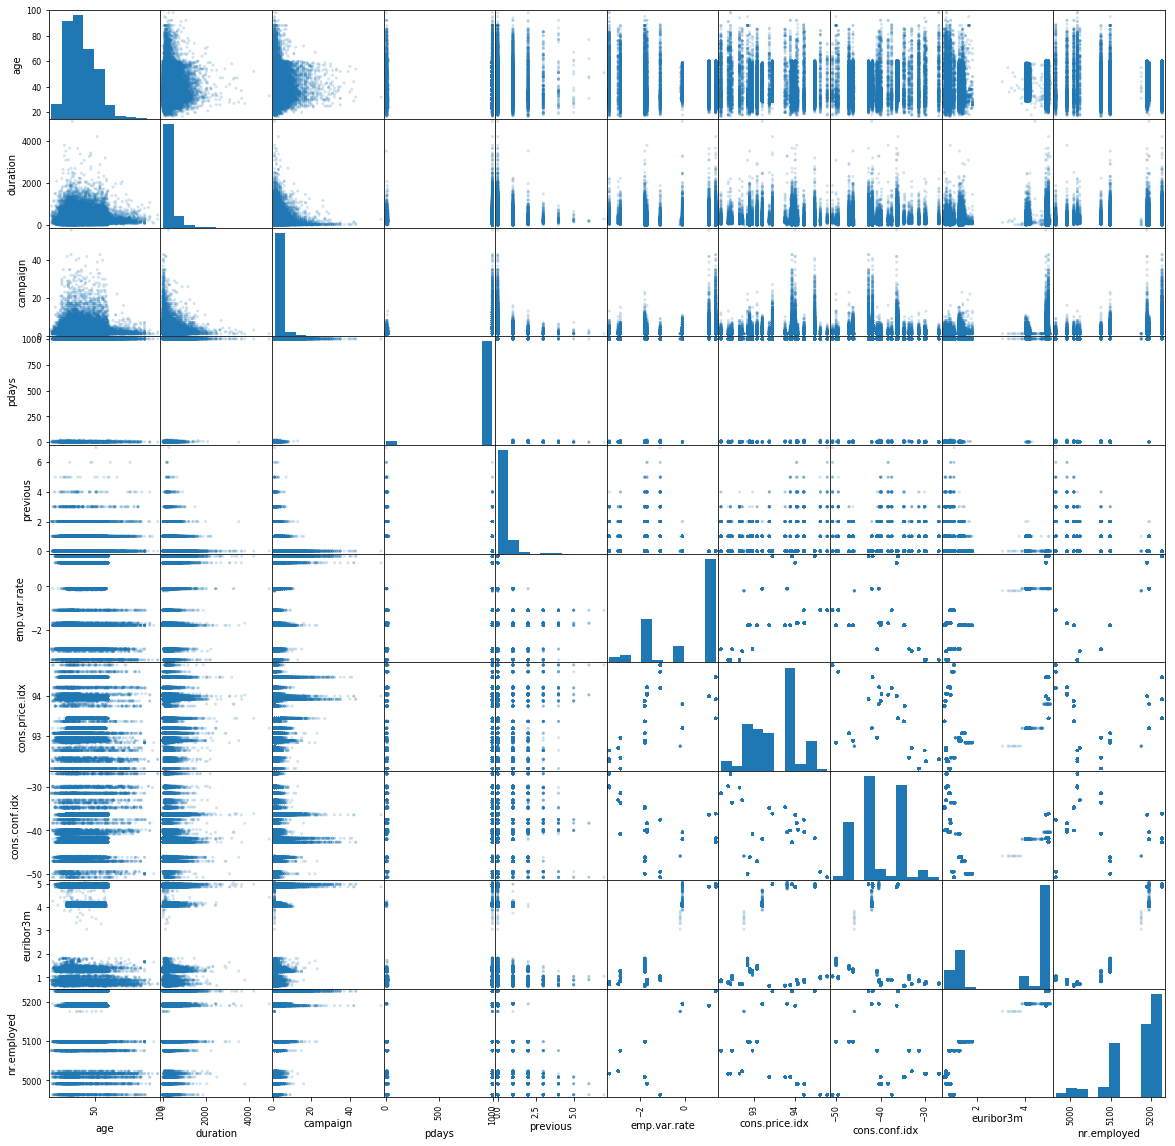

In [44]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (20, 20))

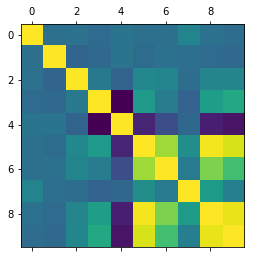

In [58]:
plt.matshow(df.corr())

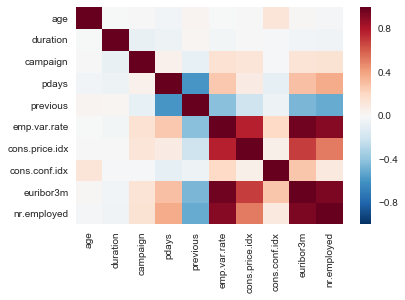

In [61]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [65]:
print(corr)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000815  0.004468 -0.034381  0.024384   
duration       -0.000815  1.000000 -0.071633 -0.047560  0.020608   
campaign        0.004468 -0.071633  1.000000  0.052574 -0.079122   
pdays          -0.034381 -0.047560  0.052574  1.000000 -0.587512   
previous        0.024384  0.020608 -0.079122 -0.587512  1.000000   
emp.var.rate   -0.000395 -0.027993  0.150711  0.271022 -0.420520   
cons.price.idx  0.000870  0.005275  0.127855  0.078899 -0.203151   
cons.conf.idx   0.129366 -0.008194 -0.013809 -0.091344 -0.050947   
euribor3m       0.010745 -0.032926  0.135091  0.296921 -0.454530   
nr.employed    -0.017755 -0.044724  0.144052  0.372620 -0.501358   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000395        0.000870       0.129366   0.010745   
duration           -0.027993        0.005275      -0.008194  -0.032926   
campaign            0.150711 

# Algorithms and Techniques

The algorithms employed in this project and the respective motivation are:

- Multi Layer Perceptron (MLP): MLPs are know as efficient function approximators. Thus, as the dependency of y regarding the other features can be mapped into a unknown function, a MLP seem suitable for this problem.

- Random Forest (RF): Random Forests rely on a simpler approach of training but can be very efficient in certain problems. As this problem seems to be solvable by considering the combination of different (and simple) methods, RF could be a fast and efficient approach.

- AdaBoost: Our goal in using AdaBoost is to verify if a combination of models could be appropriate in this problem.

- k-Nearest Neighbour (KNN): Our goal in using KNN is to verify if a simple model could be appropriate in this problem.


# Turning categorical data into numerical

In [5]:
from sklearn import preprocessing
import copy
evaluated_df = copy.deepcopy(df)
for col in cat_cols:
    enc = preprocessing.LabelEncoder()
    enc.fit(df[col])
    evaluated_df[col] = enc.transform(df[col])
evaluated_df.head()

    

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1 ...         1    999         0         1           1.1   
1            1 ...         1    999         0         1           1.1   
2            1 ...         1    999         0         1           1.1   
3            1 ...         1    999         0         1           1.1   
4            1 ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

As the data is imballanced, it would be interesting to using a specific technque in order to fix it. EliteDataScience gives us a simple solution that can be applied to our project (https://elitedatascience.com/imbalanced-classes): Up-sample Minority Class. This consists in resampling the instances of the minority class.

In [6]:
from sklearn.utils import resample
# Separating majority and minority classes
df_majority = evaluated_df[evaluated_df["y"]==0]
df_minority = evaluated_df[evaluated_df["y"]==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1)
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled["y"].value_counts()
 


1    36544
0    36544
Name: y, dtype: int64

# Separing the dataset into X and y

In [7]:
df_upsampled_y = df_upsampled["y"]
del df_upsampled["y"]
df_upsampled_X = df_upsampled

# Function for evaluating the model

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, matthews_corrcoef, roc_auc_score, roc_curve
import timeit

def evaluate(m, model_name, X, y, cv = 5, plot_roc=False):
    model = copy.deepcopy(m)
    start = timeit.default_timer()
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)
    acc = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    auc = roc_auc_score(y, y_pred)
    # prints
    print(model_name +":\n\tAccuracy: %0.2f"%acc)
    print("\tRecall: ",recall)
    print("\tMCC: ",mcc)
    print("\tAUC: ",auc)
    print("\tConfusion Matrix: ",list(conf_matrix))
    stop = timeit.default_timer()
    print('\tTime: %0.2fs\n'% (stop - start))


# Benchmark
Applying a Linear Regression model as benchmark for other models.

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# Cross validation, 5 folds
evaluate(lr, "Logistic Regrassion", df_upsampled_X, df_upsampled_y)


Logistic Regrassion:
	Accuracy: 0.81
	Recall:  0.8603053852889667
	MCC:  0.6296596785795183
	AUC:  0.8134440674255692
	Confusion Matrix:  [array([28014,  8530]), array([ 5105, 31439])]
	Time: 7.79s



# Methodology
# Data Preprocessing
Now, let's order the features in terms of their importance in the y outcome. Thus, we can build DataFrames with different number of features remove (in our case, 1, 2, 3 and 4 features removed).

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
feature_selecctor = ExtraTreesClassifier(n_estimators=50)
feature_selecctor = feature_selecctor.fit(df_upsampled_X, df_upsampled_y)
impartances = feature_selecctor.feature_importances_
rank = []
rank_names = []
while max(impartances)!=-np.inf:
    i = np.argmax(impartances)
    rank += [impartances[i]]
    rank_names += [list(df_upsampled_X)[i]]
    impartances[i] = -np.inf

for i in range(len(rank)):
    print(i+1, "= ",rank_names[i], rank[i])

df_X_1_removed = copy.deepcopy(df_upsampled_X)
del df_X_1_removed[rank_names[-1]]
df_X_2_removed = copy.deepcopy(df_upsampled_X)
del df_X_2_removed[rank_names[-1]]
del df_X_2_removed[rank_names[-2]]
df_X_3_removed = copy.deepcopy(df_upsampled_X)
del df_X_3_removed[rank_names[-1]]
del df_X_3_removed[rank_names[-2]]
del df_X_3_removed[rank_names[-3]]
df_X_4_removed = copy.deepcopy(df_upsampled_X)
del df_X_4_removed[rank_names[-1]]
del df_X_4_removed[rank_names[-2]]
del df_X_4_removed[rank_names[-3]]
del df_X_4_removed[rank_names[-4]]

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


1 =  duration 0.31450803249832254
2 =  euribor3m 0.11907119766172382
3 =  age 0.06340164603058879
4 =  emp.var.rate 0.06008378195694905
5 =  nr.employed 0.05577889343422538
6 =  campaign 0.04487109134290383
7 =  job 0.04432122285585836
8 =  education 0.04389579112072707
9 =  day_of_week 0.03963489588552998
10 =  pdays 0.02932278995122493
11 =  marital 0.028535537109854726
12 =  poutcome 0.02267720103380855
13 =  cons.conf.idx 0.021028956118339596
14 =  housing 0.020775286484270725
15 =  cons.price.idx 0.019611588632638823
16 =  contact 0.016979233979238555
17 =  month 0.01669959145070174
18 =  loan 0.016366814080364268
19 =  default 0.01418316679004008
20 =  previous 0.008253281582689231


Finally, let's run our bechmark model in all these different datasets.

In [40]:
evaluate(lr, "Logistic Regrassion", df_X_1_removed, df_upsampled_y)
evaluate(lr, "Logistic Regrassion", df_X_2_removed, df_upsampled_y)
evaluate(lr, "Logistic Regrassion", df_X_3_removed, df_upsampled_y)
evaluate(lr, "Logistic Regrassion", df_X_4_removed, df_upsampled_y)

Logistic Regrassion:
	Accuracy: 0.82
	Recall:  0.86222088441331
	MCC:  0.6337143943167143
	AUC:  0.815469023642732
	Confusion Matrix:  [array([28092,  8452]), array([ 5035, 31509])]
	Time: 8.79s

Logistic Regrassion:
	Accuracy: 0.81
	Recall:  0.8616735989492119
	MCC:  0.6299799315451167
	AUC:  0.8135261602451839
	Confusion Matrix:  [array([27970,  8574]), array([ 5055, 31489])]
	Time: 8.86s

Logistic Regrassion:
	Accuracy: 0.82
	Recall:  0.858526707530648
	MCC:  0.6358886939270342
	AUC:  0.8168372373029772
	Confusion Matrix:  [array([28327,  8217]), array([ 5170, 31374])]
	Time: 8.46s

Logistic Regrassion:
	Accuracy: 0.82
	Recall:  0.8533548598949212
	MCC:  0.6435783726762959
	AUC:  0.8211197460595447
	Confusion Matrix:  [array([28829,  7715]), array([ 5359, 31185])]
	Time: 8.46s



# Implementation
Now, let's build the models for predicting the y outcomes.

Multi Layer Perceptron (MLP) 

In [11]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(activation = 'relu', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1)
mlp2 = MLPClassifier(activation = 'tanh', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1)
mlp3 = MLPClassifier(activation = 'logistic', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1)

Support Vector Machines (SVM) models

In [12]:
from sklearn.svm import SVC
svm1 = SVC(random_state = 1, kernel = 'linear', gamma=0.1)
svm2 = SVC(random_state = 1, kernel = 'poly', gamma=0.1)
svm3 = SVC(random_state = 1, kernel = 'rbf', gamma=0.1)

Random Forest (RF) models


In [13]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1)
rf2 = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=1)
rf3 = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=1)

AdaBoost models


In [14]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(random_state = 1, n_estimators=100)#base_estimator = DecisionTreeClassifier(random_state = 1, max_depth=1))
ada2 = AdaBoostClassifier(random_state = 1, n_estimators=50)
ada3 = AdaBoostClassifier(random_state = 1, n_estimators=20)

k-Nearest Neighbour (KNN) models

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3, algorithm = 'ball_tree')
knn2 = KNeighborsClassifier(n_neighbors=3, algorithm = 'kd_tree')
knn3 = KNeighborsClassifier(n_neighbors=3, algorithm = 'auto')

# Results
# Model Evaluation and Validation
Firstly, Lets build the model list.

In [ ]:
models = [mlp1, mlp2, mlp3, svm1, svm2, svm3, rf1, rf2, rf3, ada1, ada2, ada3, knn1, knn2, knn3]
models_names = ['mlp1', 'mlp2', 'mlp3', 'svm1', 'svm2', 'svm3', 'rf1', 'rf2', 'rf3', 'ada1', 'ada2', 'ada3', 'knn1', 'knn2', 'knn3']
print("built!")

Then, we need to test the performance of each model for the original dataset, as well as for preprocessed datasets.

In [17]:
def evaluate_all_datasets(m, model_name):
    global df_upsampled_X, df_upsampled_y, df_X_1_removed, df_X_2_removed, df_X_3_removed, df_X_4_removed
    model = copy.deepcopy(m)
    print("Original Dataset")
    evaluate(model, model_name, df_upsampled_X, df_upsampled_y)
    print("1 feature removed")
    evaluate(model, model_name, df_X_1_removed, df_upsampled_y)
    print("2 features removed")
    evaluate(model, model_name, df_X_2_removed, df_upsampled_y)
    print("3 features removed")
    evaluate(model, model_name, df_X_3_removed, df_upsampled_y)
    print("4 features removed")
    evaluate(model, model_name, df_X_4_removed, df_upsampled_y)

In [50]:
evaluate_all_datasets(mlp1, "mlp1")
evaluate_all_datasets(mlp2, "mlp3")
evaluate_all_datasets(mlp2, "mlp3")

Original Dataset
mlp1:
	Accuracy: 0.80
	Recall:  0.9426992119089317
	MCC:  0.626167636344714
	AUC:  0.8000766199649737
	Confusion Matrix:  [array([24026, 12518]), array([ 2094, 34450])]
	Time: 7.42s

1 feature removed
mlp1:
	Accuracy: 0.79
	Recall:  0.817042469352014
	MCC:  0.5840240072245381
	AUC:  0.7916347416812609
	Confusion Matrix:  [array([28001,  8543]), array([ 6686, 29858])]
	Time: 10.36s

2 features removed
mlp1:
	Accuracy: 0.81
	Recall:  0.9504706654991243
	MCC:  0.6397067642254445
	AUC:  0.806260945709282
	Confusion Matrix:  [array([24194, 12350]), array([ 1810, 34734])]
	Time: 8.23s

3 features removed
mlp1:
	Accuracy: 0.80
	Recall:  0.9033220227670753
	MCC:  0.6086286872728733
	AUC:  0.7974086033274956
	Confusion Matrix:  [array([25270, 11274]), array([ 3533, 33011])]
	Time: 12.25s

4 features removed
mlp1:
	Accuracy: 0.77
	Recall:  0.6686460157618214
	MCC:  0.5566042560166892
	AUC:  0.7722608362521892
	Confusion Matrix:  [array([32008,  4536]), array([12109, 24435])]
	Ti

In [23]:
evaluate_all_datasets(rf1, "rf1")
evaluate_all_datasets(rf2, "rf2")
evaluate_all_datasets(rf3, "rf3")

Original Dataset
rf1:
	Accuracy: 0.67
	Recall:  0.8032508756567426
	MCC:  0.35557654010415174
	AUC:  0.6715055823117337
	Confusion Matrix:  [array([19725, 16819]), array([ 7190, 29354])]
	Time: 9.34s

1 feature removed
rf1:
	Accuracy: 0.62
	Recall:  0.7618487302977233
	MCC:  0.25810664853843107
	AUC:  0.6240559325744308
	Confusion Matrix:  [array([17770, 18774]), array([ 8703, 27841])]
	Time: 8.48s

2 features removed
rf1:
	Accuracy: 0.63
	Recall:  0.7390542907180385
	MCC:  0.2608358356603128
	AUC:  0.6271070490367775
	Confusion Matrix:  [array([18826, 17718]), array([ 9536, 27008])]
	Time: 8.07s

3 features removed
rf1:
	Accuracy: 0.62
	Recall:  0.7452933450087565
	MCC:  0.24908513521263712
	AUC:  0.6206080341506129
	Confusion Matrix:  [array([18123, 18421]), array([ 9308, 27236])]
	Time: 8.25s

4 features removed
rf1:
	Accuracy: 0.67
	Recall:  0.784643169877408
	MCC:  0.3416934405310454
	AUC:  0.6659643169877407
	Confusion Matrix:  [array([20000, 16544]), array([ 7870, 28674])]
	Time

In [22]:
evaluate_all_datasets(ada1, "ada1")
evaluate_all_datasets(ada2, "ada2")
evaluate_all_datasets(ada3, "ada3")

Original Dataset
ada1:
	Accuracy: 0.66
	Recall:  0.8898861646234676
	MCC:  0.36129563624051747
	AUC:  0.6605188266199649
	Confusion Matrix:  [array([15756, 20788]), array([ 4024, 32520])]
	Time: 20.40s

1 feature removed
ada1:
	Accuracy: 0.66
	Recall:  0.8898861646234676
	MCC:  0.36129563624051747
	AUC:  0.6605188266199649
	Confusion Matrix:  [array([15756, 20788]), array([ 4024, 32520])]
	Time: 21.26s

2 features removed
ada1:
	Accuracy: 0.67
	Recall:  0.8912543782837128
	MCC:  0.38323070240616364
	AUC:  0.6722580998248686
	Confusion Matrix:  [array([16564, 19980]), array([ 3974, 32570])]
	Time: 20.49s

3 features removed
ada1:
	Accuracy: 0.66
	Recall:  0.8911449211908932
	MCC:  0.36844970667869054
	AUC:  0.6641445928196147
	Confusion Matrix:  [array([15975, 20569]), array([ 3978, 32566])]
	Time: 20.44s

4 features removed
ada1:
	Accuracy: 0.66
	Recall:  0.8911449211908932
	MCC:  0.36844970667869054
	AUC:  0.6641445928196147
	Confusion Matrix:  [array([15975, 20569]), array([ 3978, 32

In [18]:
evaluate_all_datasets(knn1, "knn1")
evaluate_all_datasets(knn2, "knn2")
evaluate_all_datasets(knn3, "knn3")

Original Dataset
knn1:
	Accuracy: 0.87
	Recall:  0.9961690017513135
	MCC:  0.7665247314532342
	AUC:  0.8710732267950962
	Confusion Matrix:  [array([27261,  9283]), array([  140, 36404])]
	Time: 21.96s

1 feature removed
knn1:
	Accuracy: 0.87
	Recall:  0.9961690017513135
	MCC:  0.7667060605513589
	AUC:  0.8711826838879159
	Confusion Matrix:  [array([27269,  9275]), array([  140, 36404])]
	Time: 20.38s

2 features removed
knn1:
	Accuracy: 0.87
	Recall:  0.9961690017513135
	MCC:  0.7669327509439436
	AUC:  0.8713195052539404
	Confusion Matrix:  [array([27279,  9265]), array([  140, 36404])]
	Time: 19.80s

3 features removed
knn1:
	Accuracy: 0.87
	Recall:  0.9962237302977233
	MCC:  0.7671818134622429
	AUC:  0.871456326619965
	Confusion Matrix:  [array([27287,  9257]), array([  138, 36406])]
	Time: 18.85s

4 features removed
knn1:
	Accuracy: 0.87
	Recall:  0.9961690017513135
	MCC:  0.7677491038859495
	AUC:  0.8718120621716287
	Confusion Matrix:  [array([27315,  9229]), array([  140, 36404])]

# Results

The best results for each classifier are presented below:

4 features removed
Logistic Regrassion:
	Accuracy: 0.82
	Recall:  0.8533548598949212
	MCC:  0.6435783726762959
	AUC:  0.8211197460595447
	Confusion Matrix:  [array([28829,  7715]), array([ 5359, 31185])]
	Time: 8.46s
    
3 features removed
mlp3:
	Accuracy: 0.82
	Recall:  0.8724551225919439
	MCC:  0.6473212064813741
	AUC:  0.8220090849387041
	Confusion Matrix:  [array([28196,  8348]), array([ 4661, 31883])]
	Time: 24.72s
    


4 features removed
rf2:
	Accuracy: 0.70
	Recall:  0.9195216725043783
	MCC:  0.44068138688713476
	AUC:  0.6974058669001751
	Confusion Matrix:  [array([17369, 19175]), array([ 2941, 33603])]
	Time: 12.37s
    


2 features removed
ada3:
	Accuracy: 0.71
	Recall:  0.8834008318739054
	MCC:  0.45023720611764906
	AUC:  0.7113753283712784
	Confusion Matrix:  [array([19710, 16834]), array([ 4261, 32283])]
	Time: 4.82s
    
1 feature removed
knn2:
	Accuracy: 0.87
	Recall:  0.9961690017513135
	MCC:  0.7667060605513589
	AUC:  0.8711826838879159
	Confusion Matrix:  [array([27269,  9275]), array([  140, 36404])]
	Time: 11.74s
    
Comparing the results achieved, it is really interesting that KNN outperformed all the other models. This is due to its simplicity. However, in different machine problems, the performance of each model varies considerably and simpler model can outperform more complex ones. 

Furthermore, note that the results are considerably similar. The KNN (kd_tree) achieved 87% of accuracy and a Area Under the ROC Curve (AUC) of 0.8.

Similarly, the mlp model (logistic, (10,10)) presented 82% of Accuracy and 0.82 of AUC.

Finally, the benchmark model (Logistic Regression) achieved 82% of Accuracy and 0.82 of AUC.


# Conclusion

In this project, we could develop a prediction model that is able to identify if a customer is prone to subscribe a term deposit. KNN presented the best results, with 87% of Accuracy.